
# GRIP @ The Sparks Foundation
## Task 1 : Prediction using Supervised Machine Learning

### In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### This is a simple linear regression task as it involves just two variables.  

### Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib
## Presented by : Luminavathy


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# import dataset

data=pd.read_csv("student_scores - student_scores.csv")

In [3]:
# view of first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# view of last 5 rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# to see the statistics of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# full summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## EDA

In [7]:
# import libraries for plotting graphs
import seaborn as sns

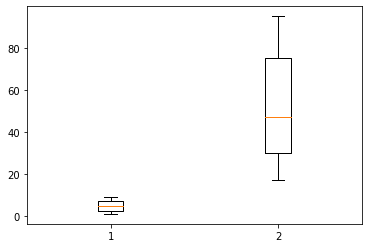

In [8]:
# Boxplot
plt.boxplot(data)
plt.show()

<AxesSubplot:>

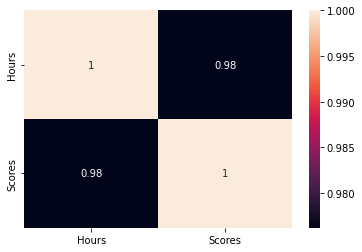

In [9]:
##import heatmap
sns.heatmap(data.corr(), annot=True)
# the darker shades of the chart represent higher values than the lighter shade


In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualizing data

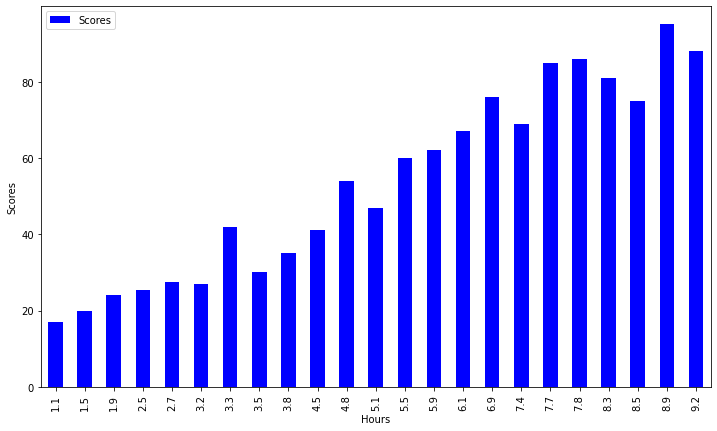

In [11]:
Study_Hours= data.pivot_table(index="Hours",values="Scores",aggfunc=np.median)

Study_Hours.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

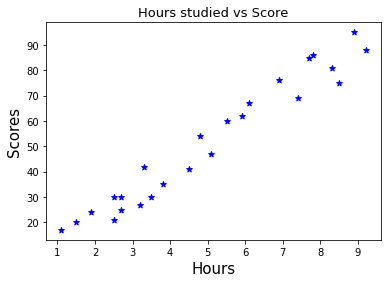

In [12]:
# plotting scatter plot

plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score',fontsize=13)
plt.scatter(data.Hours,data.Scores,color='blue',marker='*')
plt.show()

### If the number of study hours increase corresponding scores also increases
### We Can see clearly by using barchart and ScatterPlot

In [13]:
# splitting our target variable
X=data.iloc[:,:1].values
y=data.iloc[:,1:].values



## Splitting train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3) #splitting into train and test dataset


In [18]:
#Review of our train and test data
print("X_Train_Shape:",X_train.shape, "X_Test_Shape:",X_test.shape)
print("y_Train_Shape:",y_train.shape,"y_Test_Shape:",y_test.shape)


X_Train_Shape: (17, 1) X_Test_Shape: (8, 1)
y_Train_Shape: (17, 1) y_Test_Shape: (8, 1)


## Linear Regression Algorithm

In [19]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression() #creating a regressor


In [20]:
regressor.fit(X_train, y_train) #Fitting the dataset into the model


LinearRegression()

## Visualization of train data



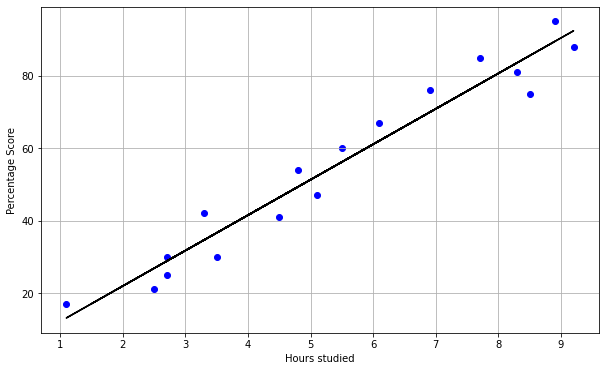

In [21]:
#Visualizion
line = regressor.coef_*X + regressor.intercept_

#plotting training data
plt.rcParams['figure.figsize'] = [10,6]
plt.scatter(X_train, y_train, color='b')
plt.plot(X, line, color='black');
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()



## Visualization of test data



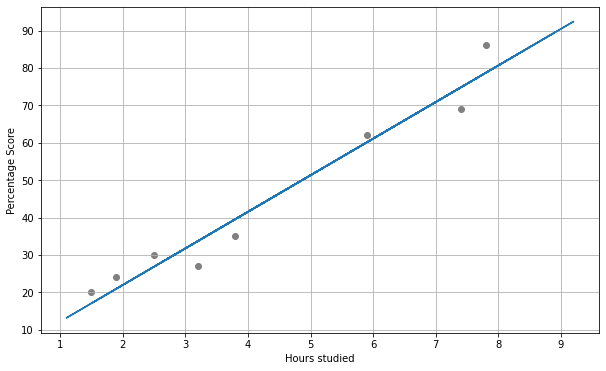

In [22]:
#plotting test data
plt.rcParams['figure.figsize'] = [10,6]
plt.scatter(X_test, y_test, color='grey')
plt.plot(X, line);
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


In [23]:
#predecting scores
print(X_test)
y_pred = regressor.predict(X_test)
 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [24]:
#actual vs predicted

y_test


array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]], dtype=int64)

In [25]:

y_pred


array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [26]:
#actual vs predicted 
comp = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
comp


,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.05366541246545], [33.69422877993883], [74..."


In [27]:
#testing own data

hours = 9.25
own_pred = regressor.predict([[hours]])
print('The predicted score if a person studies for', hours, 'hours is', own_pred[0])


The predicted score if a person studies for 9.25 hours is [92.91505723]


In [28]:
#Evaluating the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
 

Mean Absolute Error: 4.419727808027652
